In [1]:
pip install tweepy

In [2]:
pip install textblob

In [3]:
pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 39.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681833 sha256=153ac08fa70d7b429cd92f83cc45ff11886cf7ed8c22aa7e64f65250560c20d5
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [4]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=25f96fcbedf9fc8b7e86d338a464a26932beff194bd31f97681859f09992ca57
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [5]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [7]:
import tweepy
import re
import time

In [8]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
uploaded = files.upload()

Saving OpenDataTwitter_hot_posts2.txt to OpenDataTwitter_hot_posts2.txt


In [ ]:
# Reading the dataset
#data = pd.read_json('AvengersEndGametweets.json', lines=True) # Read the dataset.
data = pd.read_csv('Open Data Twitter _hot_ posts.txt', encoding='utf-8') # Read the dataset.

<ipython-input-22-bbb4e83c5185>:3: DtypeWarning: Columns (5,6,8,19,23,30,37,46,65) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Open Data Twitter _hot_ posts.txt', encoding='utf-8') # Read the dataset.


In [ ]:
df = data.copy()

In [ ]:
df

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,...,user_profile_sidebar_fill_color,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_url,user_utc_offset,user_verified
0,1.338985e+18,cuestion_p,¡En @cuestion_p le apostamos a los datos abier...,Tue Dec 15 23:10:00 +0000 2020,15/12/2020 23:10:00,NaN,NaN,NaN,NaN,9.156155e+17,...,0,0,NaN,NaN,cuestion_p,17205.0,NaN,https://cuestionpublica.com/abonate-al-club-cp/,NaN,NaN
1,1.338968e+18,PieterOmtzigt,Hier de cijfers van vorig jaar. \nVoor Corona\...,Tue Dec 15 22:02:46 +0000 2020,15/12/2020 22:02:46,NaN,NaN,1.922396e+07,PieterOmtzigt,1.922396e+07,...,DAECF4,663B12,True,NaN,PieterOmtzigt,37161.0,NaN,http://www.pieteromtzigt.nl,NaN,True
2,1.338967e+18,merrdiff,Astronomer denizens of twitter! Have you done ...,Tue Dec 15 21:57:50 +0000 2020,15/12/2020 21:57:50,NaN,NaN,NaN,NaN,1.155161e+08,...,C0DFEC,333333,True,NaN,merrdiff,15384.0,NaN,http://staff.washington.edu/mrawls,NaN,NaN
3,1.338966e+18,mikewulder,"Excellent post. 🏆\n""It's not the sale of data ...",Tue Dec 15 21:56:20 +0000 2020,15/12/2020 21:56:20,NaN,NaN,NaN,NaN,4.004090e+08,...,DDEEF6,333333,True,NaN,mikewulder,3584.0,NaN,https://www.researchgate.net/profile/Michael_W...,NaN,NaN
4,1.338961e+18,demo_demo_nl,@thierrybaudet Heb nog even uitgerekend wat de...,Tue Dec 15 21:37:50 +0000 2020,15/12/2020 21:37:50,NaN,NaN,8.413641e+17,demo_demo_nl,8.413641e+17,...,DDEEF6,333333,True,NaN,demo_demo_nl,13839.0,NaN,http://www.demo-demo.nl/,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24617,9.786153e+17,dataenvagency,NOTICE: From the 1st April all commercial re-u...,Tue Mar 27 12:50:36 +0000 2018,27/03/2018 13:50:36,NaN,en,NaN,NaN,5.225594e+08,...,DDEEF6,333333,NaN,NaN,dataenvagency,1975.0,Pacific Time (US & Canada),https://www.gov.uk/environment-agency,-25200.0,NaN
24618,9.785740e+17,Wellcome_AMR,Kicking off exciting day of discussions with @...,Tue Mar 27 10:06:30 +0000 2018,27/03/2018 11:06:30,NaN,en-gb,NaN,NaN,3.292777e+09,...,0,0,NaN,NaN,Wellcome_AMR,1562.0,London,http://wellcome.ac.uk/DRI,3600.0,NaN
24619,9.785564e+17,ExpressionAtlas,Talented #Biocurator? Interested in Data stand...,Tue Mar 27 08:56:49 +0000 2018,27/03/2018 09:56:49,NaN,en,NaN,NaN,7.234937e+17,...,0,0,True,NaN,ExpressionAtlas,302.0,NaN,http://www.ebi.ac.uk/gxa,NaN,NaN
24620,9.785452e+17,SemanticsConf,#5Days before #Deadline expires: Submit #Works...,Tue Mar 27 08:12:12 +0000 2018,27/03/2018 09:12:12,NaN,en,NaN,NaN,2.315608e+09,...,252429,666666,NaN,NaN,SemanticsConf,736.0,Bern,http://www.semantics.cc,7200.0,NaN


In [ ]:
df.columns

Index(['id_str', 'from_user', 'text', 'created_at', 'time', 'geo_coordinates',
       'user_lang', 'in_reply_to_user_id_str', 'in_reply_to_screen_name',
       'from_user_id_str', 'in_reply_to_status_id_str', 'source',
       'profile_image_url', 'user_followers_count', 'user_friends_count',
       'user_location', 'status_url', 'entities_str', 'contributors',
       'coordinates', 'entities', 'favorite_count', 'favorited', 'geo', 'id',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'metadata',
       'place', 'possibly_sensitive', 'retweet_count', 'retweeted',
       'truncated', 'user_contributors_enabled', 'user_created_at',
       'user_default_profile', 'user_default_profile_image',
       'user_description', 'user_favourites_count', 'user_follow_request_sent',
       'user_following', 'user_geo_enabled', 'user_id', 'user_id_str',
       'user_is_translation_enabled', 'user_is_translator',
       'user_listed_count', 'user_name', 'user_notifications',
       'user_

In [ ]:
df['lang'].unique() # Using all languages because only english languagae tweets has all none values for multiple columns which ae required for calculating scores

array(['es', 'nl', 'en', 'fr', 'und', 'ja', 'da', 'pt', 'de', 'fi', 'el',
       'it', 'ar', 'th', 'lv', 'tl', 'cs', 'sl', 'tr', 'ru', 'sr', 'sv',
       'pl', 'in', 'ca', 'et', 'bg', 'fa', 'no', 'ro', 'zh', 'ko', 'ckb',
       'iw', 'eu', 'vi', 'ne', 'cy', 'lt', 'uk', 'ht', nan, 'hi', 'mr'],
      dtype=object)

In [ ]:
df = df.loc[df['lang'] == 'en']

# Step2: Using uncleaned tweets for calculating sentiments in order to know the data balance

In [ ]:
# Step2: Using uncleaned tweets for calculating sentiments in order to know the data balance with percentage of positive, negative and neutral tweets
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

In [ ]:
tweets = df

In [ ]:
tweets['text']

2        Astronomer denizens of twitter! Have you done ...
3        Excellent post. 🏆\n"It's not the sale of data ...
6        Our new manuscript published at @JGRBiogeo \n\...
7        🔵Movement of Iceberg A-68A near #SouthGeorgiaI...
8        Meanwhile in Mexico, President #AMLO continues...
                               ...                        
24617    NOTICE: From the 1st April all commercial re-u...
24618    Kicking off exciting day of discussions with @...
24619    Talented #Biocurator? Interested in Data stand...
24620    #5Days before #Deadline expires: Submit #Works...
24621    We want to make it easier for people outside a...
Name: text, Length: 13993, dtype: object

In [ ]:
tweets = tweets.dropna(subset = 'text') # Dropping nan tweets in text

In [ ]:
tweets

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,...,user_profile_sidebar_fill_color,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_url,user_utc_offset,user_verified
2,1.338967e+18,merrdiff,Astronomer denizens of twitter! Have you done ...,Tue Dec 15 21:57:50 +0000 2020,15/12/2020 21:57:50,NaN,NaN,NaN,NaN,1.155161e+08,...,C0DFEC,333333,True,NaN,merrdiff,15384.0,NaN,http://staff.washington.edu/mrawls,NaN,NaN
3,1.338966e+18,mikewulder,"Excellent post. 🏆\n""It's not the sale of data ...",Tue Dec 15 21:56:20 +0000 2020,15/12/2020 21:56:20,NaN,NaN,NaN,NaN,4.004090e+08,...,DDEEF6,333333,True,NaN,mikewulder,3584.0,NaN,https://www.researchgate.net/profile/Michael_W...,NaN,NaN
6,1.338945e+18,alecksCueva,Our new manuscript published at @JGRBiogeo \n\...,Tue Dec 15 20:31:07 +0000 2020,15/12/2020 20:31:07,NaN,NaN,NaN,NaN,4.550899e+07,...,98EB1C,47018C,True,NaN,alecksCueva,5391.0,NaN,https://alejandrocueva.weebly.com/,NaN,NaN
7,1.338930e+18,Pierre_Markuse,🔵Movement of Iceberg A-68A near #SouthGeorgiaI...,Tue Dec 15 19:31:09 +0000 2020,15/12/2020 19:31:09,NaN,NaN,NaN,NaN,1.514730e+07,...,DDFFCC,333333,True,NaN,Pierre_Markuse,10223.0,NaN,https://pierre-markuse.net/,NaN,NaN
8,1.338924e+18,NathanielParish,"Meanwhile in Mexico, President #AMLO continues...",Tue Dec 15 19:07:01 +0000 2020,15/12/2020 19:07:01,NaN,NaN,NaN,NaN,9.749810e+07,...,DDEEF6,333333,True,NaN,NathanielParish,12619.0,NaN,https://www.amazon.com/Searching-Modern-Mexico...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24617,9.786153e+17,dataenvagency,NOTICE: From the 1st April all commercial re-u...,Tue Mar 27 12:50:36 +0000 2018,27/03/2018 13:50:36,NaN,en,NaN,NaN,5.225594e+08,...,DDEEF6,333333,NaN,NaN,dataenvagency,1975.0,Pacific Time (US & Canada),https://www.gov.uk/environment-agency,-25200.0,NaN
24618,9.785740e+17,Wellcome_AMR,Kicking off exciting day of discussions with @...,Tue Mar 27 10:06:30 +0000 2018,27/03/2018 11:06:30,NaN,en-gb,NaN,NaN,3.292777e+09,...,0,0,NaN,NaN,Wellcome_AMR,1562.0,London,http://wellcome.ac.uk/DRI,3600.0,NaN
24619,9.785564e+17,ExpressionAtlas,Talented #Biocurator? Interested in Data stand...,Tue Mar 27 08:56:49 +0000 2018,27/03/2018 09:56:49,NaN,en,NaN,NaN,7.234937e+17,...,0,0,True,NaN,ExpressionAtlas,302.0,NaN,http://www.ebi.ac.uk/gxa,NaN,NaN
24620,9.785452e+17,SemanticsConf,#5Days before #Deadline expires: Submit #Works...,Tue Mar 27 08:12:12 +0000 2018,27/03/2018 09:12:12,NaN,en,NaN,NaN,2.315608e+09,...,252429,666666,NaN,NaN,SemanticsConf,736.0,Bern,http://www.semantics.cc,7200.0,NaN


In [ ]:
for tweet in tweets.text:

 #print(tweet.text)
  tweet_list.append(tweet)
  analysis = TextBlob(tweet)
  score = SentimentIntensityAnalyzer().polarity_scores(tweet)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  polarity += analysis.sentiment.polarity

# If a tweet has more percentage score for negatvity than positivity then it is considered a negative tweet. Similarly, tweet with positive and neutral sentiment
  if neg > pos:
    negative_list.append(tweet)
    negative += 1
  elif pos > neg:
    positive_list.append(tweet)
    positive += 1
  elif pos == neg:
    neutral_list.append(tweet)
    neutral += 1


In [ ]:
tweets

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,...,user_profile_sidebar_fill_color,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_url,user_utc_offset,user_verified
2,1.338967e+18,merrdiff,Astronomer denizens of twitter! Have you done ...,Tue Dec 15 21:57:50 +0000 2020,15/12/2020 21:57:50,NaN,NaN,NaN,NaN,1.155161e+08,...,C0DFEC,333333,True,NaN,merrdiff,15384.0,NaN,http://staff.washington.edu/mrawls,NaN,NaN
3,1.338966e+18,mikewulder,"Excellent post. 🏆\n""It's not the sale of data ...",Tue Dec 15 21:56:20 +0000 2020,15/12/2020 21:56:20,NaN,NaN,NaN,NaN,4.004090e+08,...,DDEEF6,333333,True,NaN,mikewulder,3584.0,NaN,https://www.researchgate.net/profile/Michael_W...,NaN,NaN
6,1.338945e+18,alecksCueva,Our new manuscript published at @JGRBiogeo \n\...,Tue Dec 15 20:31:07 +0000 2020,15/12/2020 20:31:07,NaN,NaN,NaN,NaN,4.550899e+07,...,98EB1C,47018C,True,NaN,alecksCueva,5391.0,NaN,https://alejandrocueva.weebly.com/,NaN,NaN
7,1.338930e+18,Pierre_Markuse,🔵Movement of Iceberg A-68A near #SouthGeorgiaI...,Tue Dec 15 19:31:09 +0000 2020,15/12/2020 19:31:09,NaN,NaN,NaN,NaN,1.514730e+07,...,DDFFCC,333333,True,NaN,Pierre_Markuse,10223.0,NaN,https://pierre-markuse.net/,NaN,NaN
8,1.338924e+18,NathanielParish,"Meanwhile in Mexico, President #AMLO continues...",Tue Dec 15 19:07:01 +0000 2020,15/12/2020 19:07:01,NaN,NaN,NaN,NaN,9.749810e+07,...,DDEEF6,333333,True,NaN,NathanielParish,12619.0,NaN,https://www.amazon.com/Searching-Modern-Mexico...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24617,9.786153e+17,dataenvagency,NOTICE: From the 1st April all commercial re-u...,Tue Mar 27 12:50:36 +0000 2018,27/03/2018 13:50:36,NaN,en,NaN,NaN,5.225594e+08,...,DDEEF6,333333,NaN,NaN,dataenvagency,1975.0,Pacific Time (US & Canada),https://www.gov.uk/environment-agency,-25200.0,NaN
24618,9.785740e+17,Wellcome_AMR,Kicking off exciting day of discussions with @...,Tue Mar 27 10:06:30 +0000 2018,27/03/2018 11:06:30,NaN,en-gb,NaN,NaN,3.292777e+09,...,0,0,NaN,NaN,Wellcome_AMR,1562.0,London,http://wellcome.ac.uk/DRI,3600.0,NaN
24619,9.785564e+17,ExpressionAtlas,Talented #Biocurator? Interested in Data stand...,Tue Mar 27 08:56:49 +0000 2018,27/03/2018 09:56:49,NaN,en,NaN,NaN,7.234937e+17,...,0,0,True,NaN,ExpressionAtlas,302.0,NaN,http://www.ebi.ac.uk/gxa,NaN,NaN
24620,9.785452e+17,SemanticsConf,#5Days before #Deadline expires: Submit #Works...,Tue Mar 27 08:12:12 +0000 2018,27/03/2018 09:12:12,NaN,en,NaN,NaN,2.315608e+09,...,252429,666666,NaN,NaN,SemanticsConf,736.0,Bern,http://www.semantics.cc,7200.0,NaN


In [ ]:
len(positive_list)

9392

In [ ]:
len(negative_list)

1519

In [ ]:
len(neutral_list)

3082

In [ ]:
len(df)

13993

Pie chart

In [ ]:
def percentage(part,whole):
 return 100 * float(part)/float(whole)

In [ ]:
positive = percentage(positive, len(df))
negative = percentage(negative, len(df))
neutral = percentage(neutral, len(df))
polarity = percentage(polarity, len(df))
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  13993
positive number:  9392
negative number:  1519
neutral number:  3082


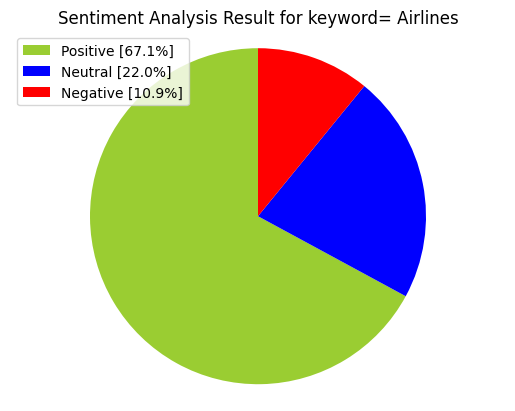

In [ ]:
#Creating PieChart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+"Airlines"+"")
plt.axis('equal')
plt.show()

In [ ]:
# tweet_list contains all tweets of positive, negative and neutral sentiments
tweet_list

,0
0,Astronomer denizens of twitter! Have you done ...
1,"Excellent post. 🏆\n""It's not the sale of data ..."
2,Our new manuscript published at @JGRBiogeo \n\...
3,🔵Movement of Iceberg A-68A near #SouthGeorgiaI...
4,"Meanwhile in Mexico, President #AMLO continues..."
...,...
13988,NOTICE: From the 1st April all commercial re-u...
13989,Kicking off exciting day of discussions with @...
13990,Talented #Biocurator? Interested in Data stand...
13991,#5Days before #Deadline expires: Submit #Works...


In [ ]:
positive_list

,0
0,Astronomer denizens of twitter! Have you done ...
1,"Excellent post. 🏆\n""It's not the sale of data ..."
2,"Wow! Amidst #COVID19 lockdown, 5 trainings + 1..."
3,"This is great, QC providing vaccine doses admi..."
4,"Goben A, Sandusky R. “Open data repositories: ..."
...,...
9387,One open-source standard. A myriad of applicat...
9388,In order to fully realise the value of open da...
9389,Kicking off exciting day of discussions with @...
9390,Talented #Biocurator? Interested in Data stand...


Sentiments Analysis: Cleaning Tweets and using cleaned tweets for calculating sentiment and further analysis

In [ ]:
# Dropping duplicated tweets
tweet_list.drop_duplicates(inplace = True)

In [ ]:
tweet_list # After removing duplicated tweets there are 318 tweets (13993 - 12667 = 146 duplicated tweets are removed)

,0
0,Astronomer denizens of twitter! Have you done ...
1,"Excellent post. 🏆\n""It's not the sale of data ..."
2,Our new manuscript published at @JGRBiogeo \n\...
3,🔵Movement of Iceberg A-68A near #SouthGeorgiaI...
4,"Meanwhile in Mexico, President #AMLO continues..."
...,...
13988,NOTICE: From the 1st April all commercial re-u...
13989,Kicking off exciting day of discussions with @...
13990,Talented #Biocurator? Interested in Data stand...
13991,#5Days before #Deadline expires: Submit #Works...


In [ ]:
# 2. Create new data frame (tw_list) and a new feature(text) containing tweets, then cleaning the text
#Cleaning Text: clean text by using lambda function and clean RT, link, punctuation, characters and finally convert to lowercase.
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

In [ ]:
tw_list["text"]

0        Astronomer denizens of twitter! Have you done ...
1        Excellent post. 🏆\n"It's not the sale of data ...
2        Our new manuscript published at @JGRBiogeo \n\...
3        🔵Movement of Iceberg A-68A near #SouthGeorgiaI...
4        Meanwhile in Mexico, President #AMLO continues...
                               ...                        
13988    NOTICE: From the 1st April all commercial re-u...
13989    Kicking off exciting day of discussions with @...
13990    Talented #Biocurator? Interested in Data stand...
13991    #5Days before #Deadline expires: Submit #Works...
13992    We want to make it easier for people outside a...
Name: text, Length: 12667, dtype: object

In [ ]:
# Creating a function for cleaning the tweets. It will clean RT, link, punctuation, characters and finally convert to lowercase.
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

In [ ]:
# Call function to get Clean tweets
tw_list['text'] = tw_list[0].apply(lambda x : clean_tweet(x))
tw_list.text.head(10)

0    astronomer denizens of twitter have you done a...
1    excellent post it s not the sale of data that ...
2    our new manuscript published at first open dat...
3    movement of iceberg a 68a near southgeorgiaisl...
4    meanwhile in mexico president amlo continues h...
5    sneak peek the team is collecting canada vacci...
6    wow amidst covid19 lockdown 5 trainings 1 awar...
7    this is great qc providing vaccine doses admin...
8    goben a sandusky r open data repositories curr...
9    using open source or open data materials into ...
Name: text, dtype: object

In [ ]:
#Calculating polarity, subjectivity using TextBlob
# Subjectivity quantifies the amount of personal opinion and factual information contained in the text.Higher subjectivity indicates that text contains personal opinion rather than factual information.
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))


In [ ]:
tw_list

,0,text,polarity,subjectivity
0,Astronomer denizens of twitter! Have you done ...,astronomer denizens of twitter have you done a...,0.000000,0.283333
1,"Excellent post. 🏆\n""It's not the sale of data ...",excellent post it s not the sale of data that ...,1.000000,1.000000
2,Our new manuscript published at @JGRBiogeo \n\...,our new manuscript published at first open dat...,0.106061,0.270202
3,🔵Movement of Iceberg A-68A near #SouthGeorgiaI...,movement of iceberg a 68a near southgeorgiaisl...,0.097619,0.459524
4,"Meanwhile in Mexico, President #AMLO continues...",meanwhile in mexico president amlo continues h...,-0.103333,0.378333
...,...,...,...,...
13988,NOTICE: From the 1st April all commercial re-u...,notice from the 1st april all commercial re us...,0.000000,0.000000
13989,Kicking off exciting day of discussions with @...,kicking off exciting day of discussions with a...,0.100000,0.466667
13990,Talented #Biocurator? Interested in Data stand...,talented biocurator interested in data standar...,0.316667,0.466667
13991,#5Days before #Deadline expires: Submit #Works...,5days before deadline expires submit workshop ...,0.000000,0.000000


In [ ]:
# Calculating sentiment based on higher positive score or negative score
for index, row in tw_list['text'].iteritems():
  score = SentimentIntensityAnalyzer().polarity_scores(row)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    tw_list.loc[index, 'sentiment'] = "negative"
  elif pos > neg:
    tw_list.loc[index, 'sentiment'] = "positive"
  else:
    tw_list.loc[index, 'sentiment'] = "neutral"

  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp


<ipython-input-53-de4e1a4b2bd8>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


In [ ]:
tw_list

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Astronomer denizens of twitter! Have you done ...,astronomer denizens of twitter have you done a...,0.000000,0.283333,positive,0.057,0.839,0.105,0.3182
1,"Excellent post. 🏆\n""It's not the sale of data ...",excellent post it s not the sale of data that ...,1.000000,1.000000,positive,0.000,0.686,0.314,0.9062
2,Our new manuscript published at @JGRBiogeo \n\...,our new manuscript published at first open dat...,0.106061,0.270202,neutral,0.000,1.000,0.000,0.0000
3,🔵Movement of Iceberg A-68A near #SouthGeorgiaI...,movement of iceberg a 68a near southgeorgiaisl...,0.097619,0.459524,neutral,0.000,1.000,0.000,0.0000
4,"Meanwhile in Mexico, President #AMLO continues...",meanwhile in mexico president amlo continues h...,-0.103333,0.378333,negative,0.154,0.846,0.000,-0.7184
...,...,...,...,...,...,...,...,...,...
13988,NOTICE: From the 1st April all commercial re-u...,notice from the 1st april all commercial re us...,0.000000,0.000000,negative,0.077,0.923,0.000,-0.2732
13989,Kicking off exciting day of discussions with @...,kicking off exciting day of discussions with a...,0.100000,0.466667,positive,0.000,0.859,0.141,0.7096
13990,Talented #Biocurator? Interested in Data stand...,talented biocurator interested in data standar...,0.316667,0.466667,positive,0.000,0.714,0.286,0.7184
13991,#5Days before #Deadline expires: Submit #Works...,5days before deadline expires submit workshop ...,0.000000,0.000000,positive,0.000,0.861,0.139,0.4939


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [ ]:
len(tw_list_negative)

1476

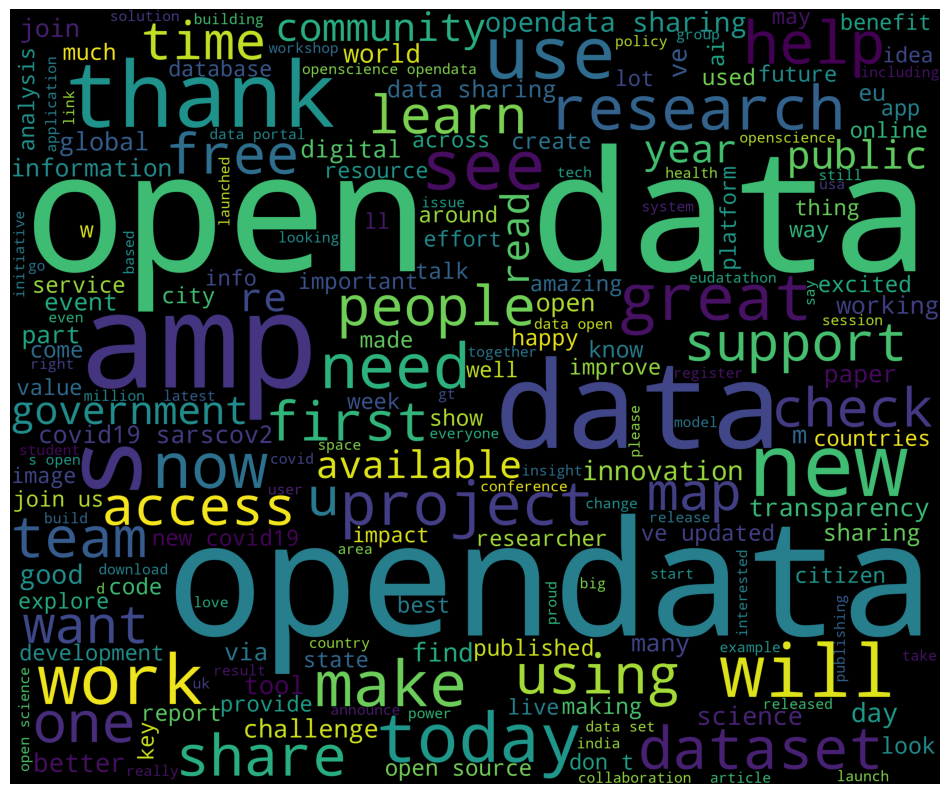

In [ ]:
# Wordcloud for tweets with positive sentiments
from wordcloud import WordCloud,STOPWORDS

new_df=tw_list[tw_list['sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('WordCloudWithPositiveSentimentAnalysisOpenData.png', bbox_inches = 'tight')
plt.show()

In [ ]:
#wordcloud.to_file("wc_opendata_pos_with_sentiment_analysis.png")

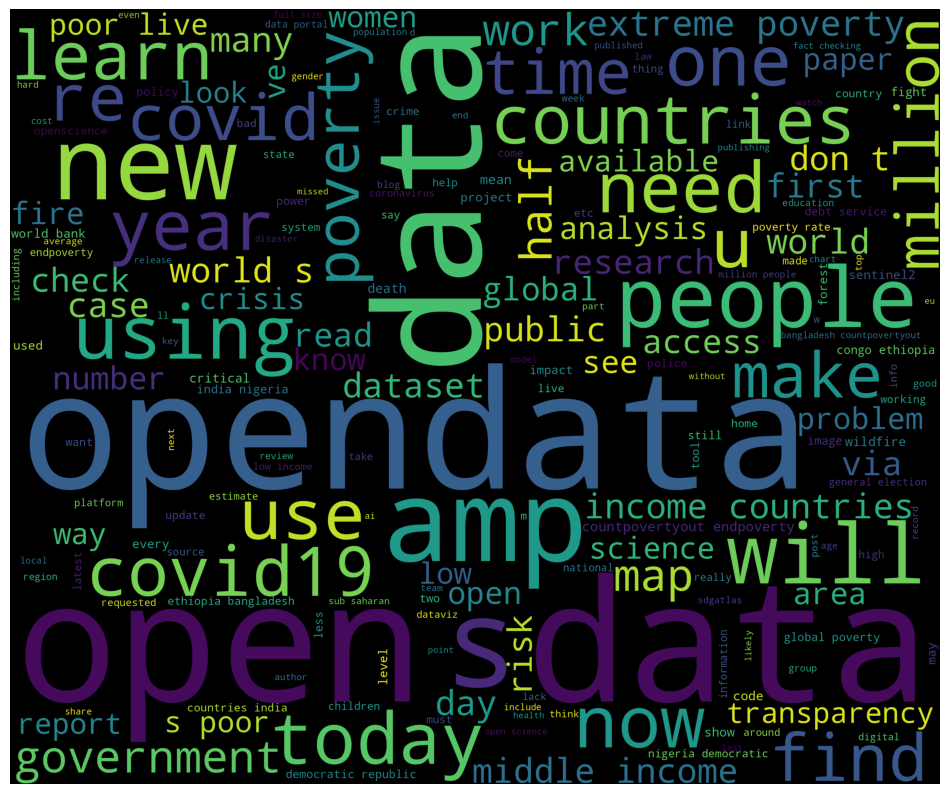

In [ ]:
# Wordcloud for tweets with negative sentiments
new_df=tw_list[tw_list['sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('WordCloudWithNegativeSentimentAnalysisOpenData.png', bbox_inches = 'tight')
plt.show()


In [ ]:
#wordcloud.to_file("wc_plebiscito_neg_with_sentiment_analysis.png")

In [ ]:
# Renaming the columns in tw_list dataframe
dict = { 0: 'text', 'text': 'textCleaned'}
tw_list.rename(columns=dict, inplace=True)

In [ ]:
tw_list

,text,textCleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Astronomer denizens of twitter! Have you done ...,astronomer denizens of twitter have you done a...,0.000000,0.283333,positive,0.057,0.839,0.105,0.3182
1,"Excellent post. 🏆\n""It's not the sale of data ...",excellent post it s not the sale of data that ...,1.000000,1.000000,positive,0.000,0.686,0.314,0.9062
2,Our new manuscript published at @JGRBiogeo \n\...,our new manuscript published at first open dat...,0.106061,0.270202,neutral,0.000,1.000,0.000,0.0000
3,🔵Movement of Iceberg A-68A near #SouthGeorgiaI...,movement of iceberg a 68a near southgeorgiaisl...,0.097619,0.459524,neutral,0.000,1.000,0.000,0.0000
4,"Meanwhile in Mexico, President #AMLO continues...",meanwhile in mexico president amlo continues h...,-0.103333,0.378333,negative,0.154,0.846,0.000,-0.7184
...,...,...,...,...,...,...,...,...,...
13988,NOTICE: From the 1st April all commercial re-u...,notice from the 1st april all commercial re us...,0.000000,0.000000,negative,0.077,0.923,0.000,-0.2732
13989,Kicking off exciting day of discussions with @...,kicking off exciting day of discussions with a...,0.100000,0.466667,positive,0.000,0.859,0.141,0.7096
13990,Talented #Biocurator? Interested in Data stand...,talented biocurator interested in data standar...,0.316667,0.466667,positive,0.000,0.714,0.286,0.7184
13991,#5Days before #Deadline expires: Submit #Works...,5days before deadline expires submit workshop ...,0.000000,0.000000,positive,0.000,0.861,0.139,0.4939


In [ ]:
# Merging tw_list dataset containing all scores: pos,neg,neutral,polarity and subjectivity, with original dataframe (original dataframe contains all twitter user columns)
df_new = df.merge(tw_list, on = 'text')

In [ ]:
df_new

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,...,user_utc_offset,user_verified,textCleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,1.338967e+18,merrdiff,Astronomer denizens of twitter! Have you done ...,Tue Dec 15 21:57:50 +0000 2020,15/12/2020 21:57:50,NaN,NaN,NaN,NaN,1.155161e+08,...,NaN,NaN,astronomer denizens of twitter have you done a...,0.000000,0.283333,positive,0.057,0.839,0.105,0.3182
1,1.338966e+18,mikewulder,"Excellent post. 🏆\n""It's not the sale of data ...",Tue Dec 15 21:56:20 +0000 2020,15/12/2020 21:56:20,NaN,NaN,NaN,NaN,4.004090e+08,...,NaN,NaN,excellent post it s not the sale of data that ...,1.000000,1.000000,positive,0.000,0.686,0.314,0.9062
2,1.338945e+18,alecksCueva,Our new manuscript published at @JGRBiogeo \n\...,Tue Dec 15 20:31:07 +0000 2020,15/12/2020 20:31:07,NaN,NaN,NaN,NaN,4.550899e+07,...,NaN,NaN,our new manuscript published at first open dat...,0.106061,0.270202,neutral,0.000,1.000,0.000,0.0000
3,1.338930e+18,Pierre_Markuse,🔵Movement of Iceberg A-68A near #SouthGeorgiaI...,Tue Dec 15 19:31:09 +0000 2020,15/12/2020 19:31:09,NaN,NaN,NaN,NaN,1.514730e+07,...,NaN,NaN,movement of iceberg a 68a near southgeorgiaisl...,0.097619,0.459524,neutral,0.000,1.000,0.000,0.0000
4,1.338924e+18,NathanielParish,"Meanwhile in Mexico, President #AMLO continues...",Tue Dec 15 19:07:01 +0000 2020,15/12/2020 19:07:01,NaN,NaN,NaN,NaN,9.749810e+07,...,NaN,NaN,meanwhile in mexico president amlo continues h...,-0.103333,0.378333,negative,0.154,0.846,0.000,-0.7184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13988,9.786153e+17,dataenvagency,NOTICE: From the 1st April all commercial re-u...,Tue Mar 27 12:50:36 +0000 2018,27/03/2018 13:50:36,NaN,en,NaN,NaN,5.225594e+08,...,-25200.0,NaN,notice from the 1st april all commercial re us...,0.000000,0.000000,negative,0.077,0.923,0.000,-0.2732
13989,9.785740e+17,Wellcome_AMR,Kicking off exciting day of discussions with @...,Tue Mar 27 10:06:30 +0000 2018,27/03/2018 11:06:30,NaN,en-gb,NaN,NaN,3.292777e+09,...,3600.0,NaN,kicking off exciting day of discussions with a...,0.100000,0.466667,positive,0.000,0.859,0.141,0.7096
13990,9.785564e+17,ExpressionAtlas,Talented #Biocurator? Interested in Data stand...,Tue Mar 27 08:56:49 +0000 2018,27/03/2018 09:56:49,NaN,en,NaN,NaN,7.234937e+17,...,NaN,NaN,talented biocurator interested in data standar...,0.316667,0.466667,positive,0.000,0.714,0.286,0.7184
13991,9.785452e+17,SemanticsConf,#5Days before #Deadline expires: Submit #Works...,Tue Mar 27 08:12:12 +0000 2018,27/03/2018 09:12:12,NaN,en,NaN,NaN,2.315608e+09,...,7200.0,NaN,5days before deadline expires submit workshop ...,0.000000,0.000000,positive,0.000,0.861,0.139,0.4939


In [ ]:
# Removing duplicates based on text
df_new.drop_duplicates(subset='text', inplace=True)

In [ ]:
df_new # The number of samples is exactly equal to the number of samples in tw_list after polarity and subjectivity

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,...,user_utc_offset,user_verified,textCleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,1.338967e+18,merrdiff,Astronomer denizens of twitter! Have you done ...,Tue Dec 15 21:57:50 +0000 2020,15/12/2020 21:57:50,NaN,NaN,NaN,NaN,1.155161e+08,...,NaN,NaN,astronomer denizens of twitter have you done a...,0.000000,0.283333,positive,0.057,0.839,0.105,0.3182
1,1.338966e+18,mikewulder,"Excellent post. 🏆\n""It's not the sale of data ...",Tue Dec 15 21:56:20 +0000 2020,15/12/2020 21:56:20,NaN,NaN,NaN,NaN,4.004090e+08,...,NaN,NaN,excellent post it s not the sale of data that ...,1.000000,1.000000,positive,0.000,0.686,0.314,0.9062
2,1.338945e+18,alecksCueva,Our new manuscript published at @JGRBiogeo \n\...,Tue Dec 15 20:31:07 +0000 2020,15/12/2020 20:31:07,NaN,NaN,NaN,NaN,4.550899e+07,...,NaN,NaN,our new manuscript published at first open dat...,0.106061,0.270202,neutral,0.000,1.000,0.000,0.0000
3,1.338930e+18,Pierre_Markuse,🔵Movement of Iceberg A-68A near #SouthGeorgiaI...,Tue Dec 15 19:31:09 +0000 2020,15/12/2020 19:31:09,NaN,NaN,NaN,NaN,1.514730e+07,...,NaN,NaN,movement of iceberg a 68a near southgeorgiaisl...,0.097619,0.459524,neutral,0.000,1.000,0.000,0.0000
4,1.338924e+18,NathanielParish,"Meanwhile in Mexico, President #AMLO continues...",Tue Dec 15 19:07:01 +0000 2020,15/12/2020 19:07:01,NaN,NaN,NaN,NaN,9.749810e+07,...,NaN,NaN,meanwhile in mexico president amlo continues h...,-0.103333,0.378333,negative,0.154,0.846,0.000,-0.7184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13988,9.786153e+17,dataenvagency,NOTICE: From the 1st April all commercial re-u...,Tue Mar 27 12:50:36 +0000 2018,27/03/2018 13:50:36,NaN,en,NaN,NaN,5.225594e+08,...,-25200.0,NaN,notice from the 1st april all commercial re us...,0.000000,0.000000,negative,0.077,0.923,0.000,-0.2732
13989,9.785740e+17,Wellcome_AMR,Kicking off exciting day of discussions with @...,Tue Mar 27 10:06:30 +0000 2018,27/03/2018 11:06:30,NaN,en-gb,NaN,NaN,3.292777e+09,...,3600.0,NaN,kicking off exciting day of discussions with a...,0.100000,0.466667,positive,0.000,0.859,0.141,0.7096
13990,9.785564e+17,ExpressionAtlas,Talented #Biocurator? Interested in Data stand...,Tue Mar 27 08:56:49 +0000 2018,27/03/2018 09:56:49,NaN,en,NaN,NaN,7.234937e+17,...,NaN,NaN,talented biocurator interested in data standar...,0.316667,0.466667,positive,0.000,0.714,0.286,0.7184
13991,9.785452e+17,SemanticsConf,#5Days before #Deadline expires: Submit #Works...,Tue Mar 27 08:12:12 +0000 2018,27/03/2018 09:12:12,NaN,en,NaN,NaN,2.315608e+09,...,7200.0,NaN,5days before deadline expires submit workshop ...,0.000000,0.000000,positive,0.000,0.861,0.139,0.4939


In [ ]:
df_new.columns

Index(['id_str', 'from_user', 'text', 'created_at', 'time', 'geo_coordinates',
       'user_lang', 'in_reply_to_user_id_str', 'in_reply_to_screen_name',
       'from_user_id_str', 'in_reply_to_status_id_str', 'source',
       'profile_image_url', 'user_followers_count', 'user_friends_count',
       'user_location', 'status_url', 'entities_str', 'contributors',
       'coordinates', 'entities', 'favorite_count', 'favorited', 'geo', 'id',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'metadata',
       'place', 'possibly_sensitive', 'retweet_count', 'retweeted',
       'truncated', 'user_contributors_enabled', 'user_created_at',
       'user_default_profile', 'user_default_profile_image',
       'user_description', 'user_favourites_count', 'user_follow_request_sent',
       'user_following', 'user_geo_enabled', 'user_id', 'user_id_str',
       'user_is_translation_enabled', 'user_is_translator',
       'user_listed_count', 'user_name', 'user_notifications',
       'user_

In [ ]:
df_new['user'][0]
# The user column contains a lot of information about the user.

KeyError: ignored

In [ ]:
# Extracting the user variables from column user
df_new['usr_name'] = df_new['user'].apply(lambda x: x.get('name'))
df_new['foll_count'] = df_new['user'].apply(lambda x: x.get('followers_count'))
df_new['friends_count'] = df_new['user'].apply(lambda x: x.get('friends_count'))
df_new['fav_count'] = df_new['user'].apply(lambda x: x.get('favourites_count'))
df_new['status_count'] = df_new['user'].apply(lambda x: x.get('statuses_count'))
#The number of public lists that this user is a member of.
df_new['listed_count'] = df_new['user'].apply(lambda x: x.get('listed_count'))
# screen name of each user
df_new['screen_name'] = df_new['user'].apply(lambda x: x.get('screen_name'))

In [ ]:
df_new.columns

Index(['created_at', 'id', 'id_str', 'text', 'source', 'truncated',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'entities', 'favorited', 'retweeted', 'filter_level', 'lang',
       'timestamp_ms', 'retweeted_status', 'extended_entities',
       'possibly_sensitive', 'display_text_range', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status', 'extended_tweet', 'limit',
       'textCleaned', 'polarity', 'subjectivity', 'sentiment', 'neg', 'neu',
       'pos', 'compound', 'usr_name', 'foll_count', 'friends_count',
       'fav_count', 'status_count', 'listed_count', 'screen_name'],
      dtype='object')

In [ ]:
df_new.to_csv("TwitterDataPrepOpenDataAll.csv")